## N-rainhas

Problema: Dado um tabuleiro de xadrez regular (NxN) e N rainhas, posicione as N Rainhas no tabuleiro de forma que elas não se coloquem em xeque.

<img src="https://raw.githubusercontent.com/hugozanini/evolutionary-computing/0feb0f40568c4ced8307a3d400753974bdb3c744/n-queens/images/tabuleiro.PNG?token=AEMXRFUKSH77STFCXP2CZRK7G7Y4S" alt="drawing" width="200"/>
    
*Figura 1. Ilustração do problema das N Rainhas com um tabuleiro 8x8.*

### Definição do problema

Inicialmente, será estabelecido um **espaço de fenótipo F**, em que estarão todas as posições possíveis para as N rainhas em um tabuleiro NxN sem que elas se coloquem em xeque.


A **qualidade $q(f)$** de qualquer fenótipo $f ∈ F$ será definida como a quantidade de pares de rainhas em xeque. Quanto menor essa medida, melhor o fenótipo.

$q(f) = 0$ indica que foi encontrada uma solução para o problema.

A partir dessas definições, será formulada uma função objetivo que será minimizada, já que conhecemos o valor ótimo do problema. Mesmo sem ainda definir os genótipos, é possível afirmar que o fitness a ser maximizado (chance de sobrevivência e reprodução) de um genótipo *g* que representa um fenótipo $f$ é o inverso de $q(f)$.

Seguindo na construção do problema, é preciso definir o genótipo, ou cromossomo. No caso nas N-rainhas, o genótipo (*g*) será definido como a permutação de números de 1 a N, em que um dado $ g = <i_1, ... i_n>$ representa uma configuração única do tabuleiro. A n-ésima coluna contém examente uma rainha localizada na i-ésima linha.

Por exemplo, em um caso em que N = 4 e $g = <1,2,3,4>$, o tabuleiro será organizada de forma que todas as rainhas estejam na diagonal, conforme a Figura 2. Portanto, o espaço de genótipos $G$ é um conjunto de permutações que definem o mapeamento $G->P$.


<img src="https://raw.githubusercontent.com/hugozanini/evolutionary-computing/master/n-queens/images/4x4.png?token=AEMXRFRC5HUG7GQ3OTN37IC7G7ZEA" alt="drawing" width="200"/>

*Figura 2. Tabuleiro 4x4 com rainhas na diagonal.*

Dess forma, é fácil notar que, usando essa configuração de cromossomos, violações horizontais (duas rainhas na mesma linha) ou violações verticais (duas rainhas na mesma coluna) não irão ocorrer. Em outras palavras, essa representação garante que metade dos requisitos já serão atendidos, o que precisa ser minimizado é o número de violações na linha diagonal.

O próximo passo é a definição dos operadores de variação (mutação e crossover). Para a **mutação**, será utilizado um operador que seleciona aleatoriamente dois valores em um dado cromossomo e inverte suas posições.

O **crossover** será realizado a partir da criação de duas novas soluções candidatas (descendentes) a partir dos genes de dois cromossomos pais. Os descendentes produzidos como resultado do crossover serão permutações válidas de N inteiros.

É importante notar que essas variações influenciam diretamente na performance dos algoritmos evolucionários. Por exemplo, usar uma mutação A pode implicar em uma solução mais rápida, enquanto uma mutação B corre o risco de nunca chegar em uma solução.

Para o problema das N-rainhas, a mutação irá causar pequenas variações unidirecionais, enquanto o crossover irá criar filhos que herdarão material genético de ambos os pais.

#### Mecanismos de atualização

Nesta seção, serão definidos os mecanismos de seleção e atualização da população. Para o gerenciamento da população, será definido que, a cada ciclo evolucionário, serão selecionados dois pais, produzindo dois filhos, e a nova população irá conter os melhores *n* individuos da populção *n + 2*.

A seleção dos pais será realizada a partir da seleção de cinco indivíduos aleatórios da população e selecionando os dois melhores como pais. Isso garante um viés em relação a utilização a utilização de pais com *fitness* maiores.

A seleção dos sobreviventes será feita a partir da ordenação da populção total (população total mais 2 descendentes) e eliminando os dois piores a cada geração.

#### Condições de término

O algoritmo será interrompido quando a solução ótima for encontrada ($q(f) = 0$) ou quando o número máximo de gerações for alcançado.

## Instalação dos requisitos

In [ ]:
!pip install matplotlib

## Solução

In [47]:
def fitness_nq(solution: list) -> int:
    '''
    Retorna a quantidade de colisões para uma dada solução (permutação)
    O número máximo de colisões que podem ocorrer é n(n-1)/2
    '''
    f = 0
    n = len(solution)
    for i in range(1, n):
        for j in range(1, n):
            if abs(i-j) == abs(solution[i] - solution[j]) and i!=j:
                f += 1
    f  = f/2
    
    return f

In [48]:
def cut_and_crossfill_crossover(parents: list, nq: int) -> list:
    '''
    parents = [[parent1],[parent2]] em que cada pai
    representa um genotipo para o problema das N rainhas
    '''
    N = len(parents[1])
    offspring = [[0]*nq,[0]*nq]
    pos = random.sample(range(7), 1)[0] #Sigle point crossover
    
    offspring[0][0:pos] = parents[0][0:pos]
    offspring[1][0:pos] = parents[1][0:pos]

    s1 = pos + 1
    s2 = pos + 1
    
    for i in range(0, N):
        check1 = 0
        check2 = 0
        for j in range(0, pos):
            if parents[1][i] == offspring[0][j]:
                check1 = 1
            if parents[0][i] == offspring[1][j]:
                check2 = 1
        if check1 == 0:
            offspring[0][s1] = parents[1][i]
            if s1 < N - 1:
                s1 += 1
        if check2 == 0:
            offspring[1][s2] = parents[0][i]
            if s2 < N - 1:
                s2 += 1
    
    return offspring

In [49]:
import random
def random_chromosome(nq):
    '''
    Criando cronomossomos aleatorios
    '''
    return [ random.randint(1, nq) for _ in range(nq) ]

In [50]:
import matplotlib.pyplot as plt
def generate_plot(fit_medio:dict, best_fit: dict, nq: int) -> None:
    plt.plot(fit_medio.keys(), fit_medio.values(), '-o', label = 'Fitness médio')
    plt.plot(best_fit.keys(), best_fit.values(), 'o', label = 'Melhor fitness')
    plt.xlabel('Geração')
    plt.ylabel('Valor')
    plt.legend(loc="upper right")
    plt.title('Evolução do fitness médio para ' + str(nq) + ' rainhas')

def conv_plot(nq, conv, index) -> None:
    plt.bar(index, conv, label = 'Fitness médio')
    plt.xlabel('População Inicial')
    plt.ylabel('Gerações')
    plt.title('Gerações necessárias para convergir ' + str(nq) + ' rainhas')

In [153]:
def n_queens(nq, np) -> None:
    '''
    nq: Numero de rainhas
    np: Tamanho da populacao inicial
    '''
    
    #Definindo o numero maximo de geracoes
    ng = nq*np
    
    #Criando a populacao com cromossomos aleatórios
    populacao = [random_chromosome(nq) for _ in range(np)] #npXnq

    #A avaliação das solucões será alocada em uma coluna extra da matriz de população
    for i in range(0, np):
        populacao[i].append(fitness_nq(populacao[i]))
    '''
    Ordenando a populacao em ordem crescente a partir da quantidade de colisões. 
    Quanto mais próximo de zero a quantidade de colisões, melhor a solução.
    '''
    populacao.sort(key=lambda x: x[-1])

    #Inicializando as variaveis
    geracao = 0
    best_fit = {}
    fit_medio = {}
    solucao = [element for element in populacao if element[-1] == 0.0]
    while geracao < ng:

        if solucao:
            print("Solução ótima encontrada na população aleatória inicial: ", solucao[0][:-1])
            break

        #Selecao aleatoria de 5 candidatos
        cand = random.sample(range(np), 5)
        cand.sort()

        #Selecao dos filhos para o próximo ciclo evolucionario
        pais_cross = [[0]*nq,[0]*nq]
        for i in range(0,2):
            for j in range(0, nq):
                pais_cross[i][j] = populacao[cand[i]][j]

        filhos = cut_and_crossfill_crossover(pais_cross, nq)

        #Realizaco de mutacao com prababilidade de ocorrer em 80%
        t = random.sample(range(10), 1)[0]
        if t > 2:
            pos_troca = random.sample(range(nq), 2)    
            for i in range(0,2):
                temp = filhos[i][pos_troca[0]]
                filhos[i][pos_troca[0]] = filhos[i][pos_troca[1]]
                filhos[i][pos_troca[1]] = temp

        #Avalicao a qualidade dos filhos
        for i in range(0,2):
            filhos[i].append(fitness_nq(filhos[i]))

        #Inserção dos filhos na população e ordenação
        populacao.append(filhos[0])
        populacao.append(filhos[1])

        populacao.sort(key=lambda x: x[-1])

        #Remocao das 2 piores solucoes
        populacao = populacao[:-2]

        #Selecionando os melhores resultados
        best_fit[geracao] = populacao[0][-1]
        fit_medio[geracao] = sum(row[-1] for row in populacao)/len(populacao)

        if populacao[0][-1] == 0:
            print("Solucao otima encontrada na geracao ", geracao)
            #print("Populacao: ", populacao[0][:-1])
            break

        if (geracao == ng - 1) and populacao[0][-1] != 0:
            print("Solucao otima nao encontrada. Numero maximo de geracoes atingido")
            break
        geracao += 1

    generate_plot(fit_medio, best_fit, nq)

## Testes

##### Serão realizados testes para três quantidade diferentes de rainhas (N = 8, N= 20 e N = 50) 
##### em que a população inicial será variada em N, 4N e 16N e 32N.

### 8 Rainhas

#### • População inicial: 8

Solucao otima encontrada na geracao  7


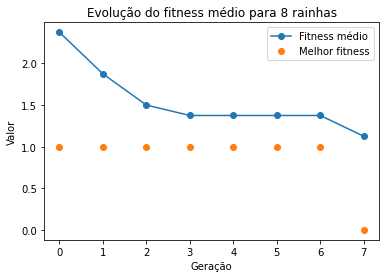

In [54]:
n_queens(8, 8)

#### • População inicial: 32

Solucao otima encontrada na geracao  12


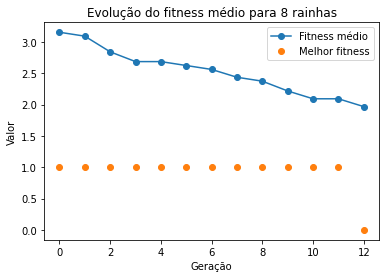

In [90]:
n_queens(8, 32)

#### • População inicial: 128

Solucao otima encontrada na geracao  24


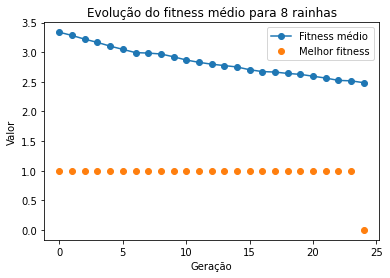

In [81]:
n_queens(8, 128)

#### • População inicial: 256

Solucao otima encontrada na geracao  27


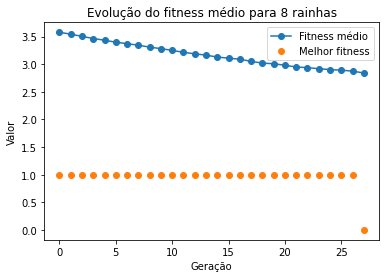

In [147]:
n_queens(8, 256)

### 20 Rainhas

#### • População inicial: 20

Solucao otima encontrada na geracao  124


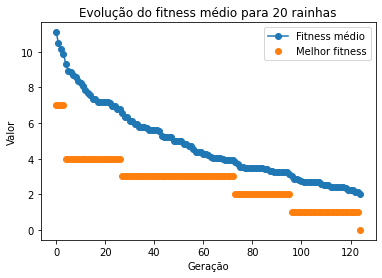

In [91]:
n_queens(20, 20)

#### • População inicial: 80

Solucao otima encontrada na geracao  1180


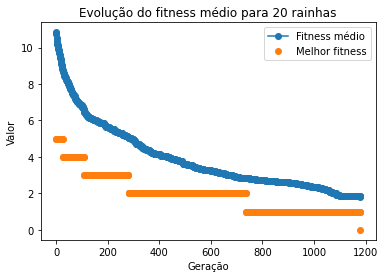

In [92]:
n_queens(20, 80)

#### • População inicial: 320

Solucao otima encontrada na geracao  2495


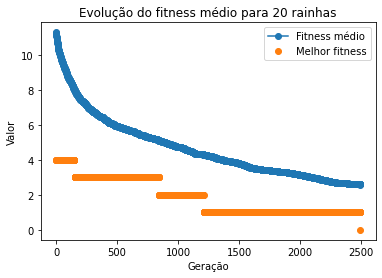

In [96]:
n_queens(20, 320)

#### • População inicial: 640

Solucao otima encontrada na geracao  4741


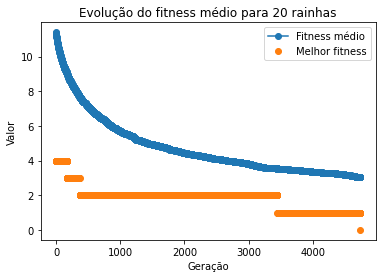

In [148]:
n_queens(20, 640)

### 50 Rainhas

#### • População inicial: 50

Solucao otima encontrada na geracao  1856


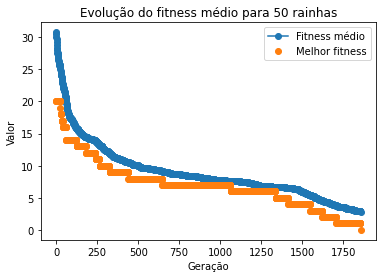

In [103]:
n_queens(50, 50)

#### • População inicial: 200

Solucao otima encontrada na geracao  8755


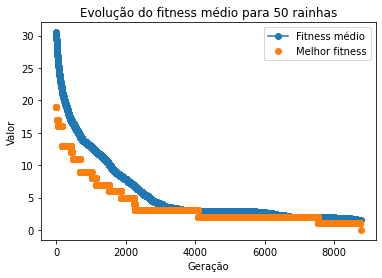

In [104]:
n_queens(50, 200)

#### • População inicial: 800

Solucao otima encontrada na geracao  30575


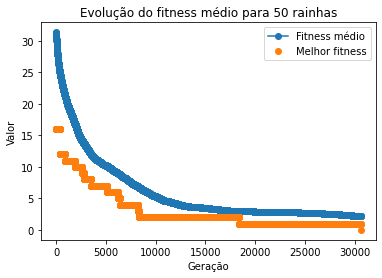

In [107]:
n_queens(50, 800)

#### • População inicial: 1600

Solucao otima nao encontrada. Numero maximo de geracoes atingido


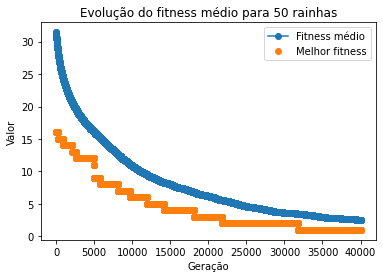

In [158]:
n_queens(50, 1600)

### Análises dos resultados

Os gráficos a seguir exibem o número de gerações necessárias para a convergência do algoritmo para as três quantidades de rainhas testadas (8, 20 e 50). Observa-se que  quanto maior o número de rainhas, mais gerações são necessárias para o algoritmo convergir. Esse é o comportamento esperado já que, quanto maior o tabuleiro, mais dificil será o problema de alocar todas as rainhas sem que elas se coloquem em cheque. 

Para N=50 e com uma população inicial de 1600, o algoritmo nãoconvergiu. A partir disso e da observação dos outros resultados, é possível dizer que ao aumentar a população mantendo o número de rainhas constante, a convergência também fica mais dificil.

O algoritmo implementado conseguiu resolver bem o problema. Métodos evolucionários são uma boa alternativa para cenários em que o espaço de candidatos é amplo e soluções de força bruta gastariam muito tempo para encontrar soluções. Em todos os casos, o algoritmo genético implementado caminhou em direção a solução esperada, mesmo quando a resposta ótima não foi encontrada, as soluções tenderam para o desejado.

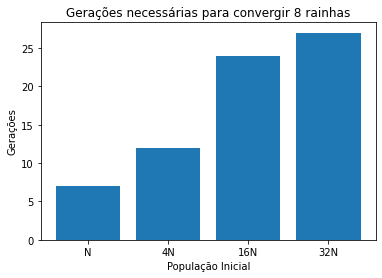

In [161]:
n_8 = [7, 12, 24, 27]
n_20 = [124, 1180, 2495, 4741]
n_50 = [1856, 8755, 30575]
conv_plot(8, n_8, ['N', '4N', '16N', '32N'])

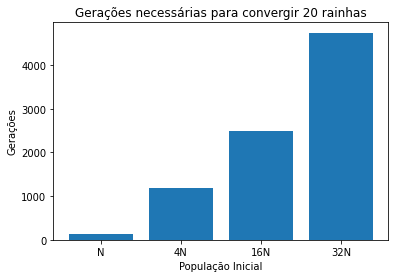

In [162]:
conv_plot(20, n_20, ['N', '4N', '16N', '32N'])

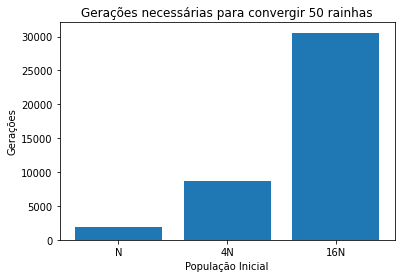

In [163]:
conv_plot(50, n_50, ['N', '4N', '16N'])